# Building a Vector Quantizer

<h4>Vector Quantization is a quantization technique where the input data is represented by a
fixed number of representative points. It is the N-dimensional equivalent of rounding off a
number. <br/>This technique is commonly used in multiple fields such as image recognition,
semantic analysis, and data science. <br/>Let's see how to use artificial neural networks to build a vector quantizer.</h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [4]:
# Load input data
# Each line in this file contains 6 numbers. 
# The first two numbers form the datapoint.
# The last four numbers form a one-hot encoded label. 
# There are 4 classes overall.
text = np.loadtxt('data_vector_quantization.txt')
print(text)

[[0.9 5.1 1.  0.  0.  0. ]
 [1.2 4.8 1.  0.  0.  0. ]
 [1.  4.9 1.  0.  0.  0. ]
 [0.8 5.2 1.  0.  0.  0. ]
 [8.  4.1 0.  1.  0.  0. ]
 [8.2 4.3 0.  1.  0.  0. ]
 [7.9 3.8 0.  1.  0.  0. ]
 [8.3 4.3 0.  1.  0.  0. ]
 [5.  1.1 0.  0.  1.  0. ]
 [5.1 0.8 0.  0.  1.  0. ]
 [5.3 1.2 0.  0.  1.  0. ]
 [4.9 0.9 0.  0.  1.  0. ]
 [5.  7.  0.  0.  0.  1. ]
 [5.2 7.2 0.  0.  0.  1. ]
 [4.9 7.1 0.  0.  0.  1. ]
 [5.1 6.8 0.  0.  0.  1. ]]


In [7]:
# Separate the text into data and labels
data = text[:, 0:2] # Columns 1 & 2
labels = text[:, 2:] # Columns 3, 4 & 5

In [16]:
# Define a neural network with 2 layers where we have 10 neurons 
# in the input layer and 4 neurons in the output layer.
num_input_neurons = 10
num_output_neurons = 4

weights = [1/num_output_neurons] * num_output_neurons # [0.25, 0.25, 0.25, 0.25]

# line 176 in the file C:\Users\AnindyaPC\Anaconda3\Lib\site-packages\neurolab (version 0.3.5):
# inx = np.floor(cn0 * pc.cumsum()) gives an error.
# The resulting inx contains an array of floating numbers, 
# while array slicing requires integers as indices.
# The fix is to cast the array of type float to an array of type integer.
# inx = np.floor(cn0 * pc.cumsum()).astype(int)
nn = nl.net.newlvq(nl.tool.minmax(data), num_input_neurons, weights)

[0.25, 0.25, 0.25, 0.25]


In [9]:
# Train the neural network using the training data
_ = nn.train(data, labels, epochs=500, goal=-1)

Epoch: 100; Error: 0.0;
Epoch: 200; Error: 0.0;
Epoch: 300; Error: 0.0;
Epoch: 400; Error: 0.0;
Epoch: 500; Error: 0.0;
The maximum number of train epochs is reached


In [15]:
# To visualize the output clusters, let's create an input grid of points.
xx, yy = np.meshgrid(np.arange(0, 10, 0.2), np.arange(0, 10, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
grid_xy = np.concatenate((xx, yy), axis=1)

In [11]:
# Evaluate the grid of points using the neural network
grid_eval = nn.sim(grid_xy)

In [12]:
# Define the 4 classes
class_1 = data[labels[:,0] == 1]
class_2 = data[labels[:,1] == 1]
class_3 = data[labels[:,2] == 1]
class_4 = data[labels[:,3] == 1]

In [13]:
# Define X-Y grids for all the 4 classes
grid_1 = grid_xy[grid_eval[:,0] == 1]
grid_2 = grid_xy[grid_eval[:,1] == 1]
grid_3 = grid_xy[grid_eval[:,2] == 1]
grid_4 = grid_xy[grid_eval[:,3] == 1]

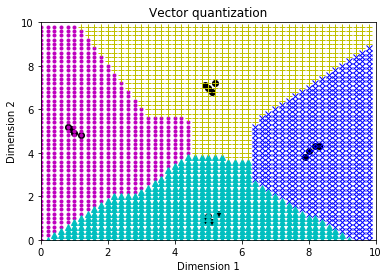

In [14]:
# Plot the outputs 
plt.plot(class_1[:,0], class_1[:,1], 'ko', 
        class_2[:,0], class_2[:,1], 'ko', 
        class_3[:,0], class_3[:,1], 'ko', 
        class_4[:,0], class_4[:,1], 'ko')
plt.plot(grid_1[:,0], grid_1[:,1], 'm.',
        grid_2[:,0], grid_2[:,1], 'bx',
        grid_3[:,0], grid_3[:,1], 'c^', 
        grid_4[:,0], grid_4[:,1], 'y+')
plt.axis([0, 10, 0, 10])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vector quantization')

plt.show()